# **1000-719bMSB Modeling of Complex Biological Systems**
# **Deep Neural Network: Supervised Learning**

## Homework - Krzysztof Łukasz - Keras

# Classification of MNIST using densely connected layers

We are going to use the Keras library to implement a neural network that can classify handwritten digits - in just a few lines of code.

First we load and inspect the data. The dataset is split into training and test data.

## HOMEWORK 1.1 FASHION MNIST

In [1]:
import numpy as np
import tensorflow.keras as keras
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
print(tf.__version__)
tf.compat.v1.disable_eager_execution()

2.15.0


In [3]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_labels.shape

(60000,)

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
test_labels.shape

(10000,)

Let's plot one of the digits and the corresponding label.

Label of element 0: 0


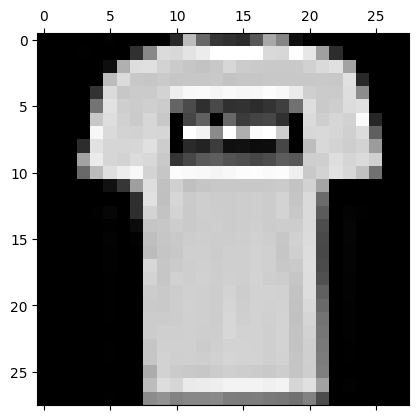

In [8]:
print('Label of element 0:',train_labels[1])
plt.matshow(train_images[1], cmap='gray')
plt.show()

In this step we define the neural network. ReLu is an activation function defined as f(x) = max(0,x).

Softmax activation function is normalized such that the sum of all outputs is equal 1.

In [9]:
from tensorflow.keras import layers
from tensorflow.keras import models
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))

With compile we tell the network which optimizer and loss function to use. Optimizer specifies the particular implementation of the gradient-descent, e.g. how it adapts the learning rate. 'Metrics' specifies the output during the training.

In [10]:
model.compile(optimizer='rmsprop',
loss='mean_squared_error',
metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


We are using a densely connected network, so we have to flatten the images.  
Input values should be in the range (0,1) for fast convergence.  

In [12]:
train_images_flat = train_images.reshape((60000, 28 * 28))
train_images_flat = train_images_flat.astype('float32') / 255
test_images_flat = test_images.reshape((10000, 28 * 28))
test_images_flat = test_images_flat.astype('float32') / 255

Convert the labels to a 'one-hot' coding.

In [13]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [14]:
train_images.reshape((60000,28*28)).shape

(60000, 784)

In [15]:
train_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

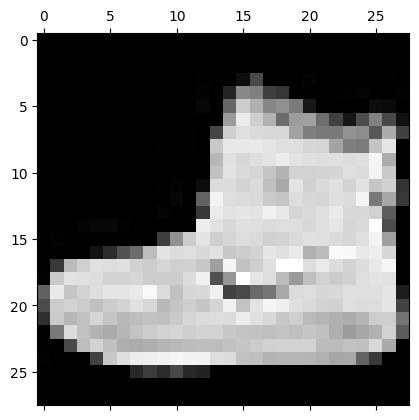

In [16]:
plt.matshow(train_images[0], cmap='gray')
plt.show()

In [17]:
model.fit(train_images_flat, train_labels, epochs=5, batch_size=128)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 74us/sample - loss: 0.0313 - accuracy: 0.7835
Epoch 2/5
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0207 - accuracy: 0.8578
Epoch 3/5
60000/60000 [==============================] - 5s 91us/sample - loss: 0.0184 - accuracy: 0.8723
Epoch 4/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.0171 - accuracy: 0.8839
Epoch 5/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.0161 - accuracy: 0.8906


Let's check the performance on the test set. If the accuracy is less than the training accuracy, then we might be overfitting!

In [18]:
test_loss, test_acc = model.evaluate(test_images_flat, test_labels)
print('test_acc:', test_acc)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


test_acc: 0.8553


We can also find the predictions for a selection of input images.

In [19]:
predictions = model.predict(train_images_flat[:10])

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


[6.6180281e-02 1.8376755e-04 8.8826433e-04 8.6013973e-01 2.5421170e-05
 3.0972409e-05 7.2437607e-02 2.2518643e-07 1.1289579e-04 8.4683910e-07]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


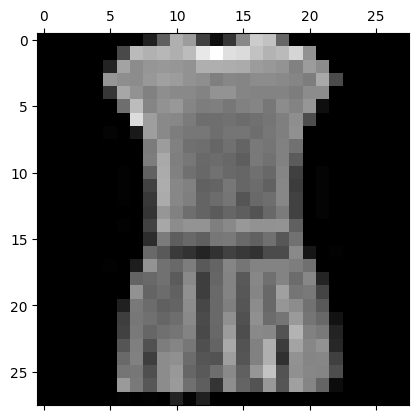

In [20]:
img_num = 3
print(predictions[img_num])
print(train_labels[img_num])
plt.matshow(train_images[img_num], cmap='gray')
plt.show()

In [21]:
train_labels

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Classification of MNIST using convolutional layers

We have build a classifier for handwritten images only using densely connected layers. Let's see if we can do better using convolutional layers!

First define the convolutional layers.

In [22]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [36]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)              

Now add a classifier on top of the convnet.

In [24]:
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))

In [25]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)              

In [26]:
train_images_conv = train_images.reshape((60000, 28, 28, 1))
train_images_conv = train_images_conv.astype('float32') / 255
test_images_conv = test_images.reshape((10000, 28, 28, 1))
test_images_conv = test_images_conv.astype('float32') / 255

In [27]:
model2.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [28]:
model2.fit(train_images_conv, train_labels, epochs=15, batch_size=64)

Train on 60000 samples
Epoch 1/15
60000/60000 [==============================] - 51s 851us/sample - loss: 0.5526 - accuracy: 0.7967
Epoch 2/15
60000/60000 [==============================] - 49s 822us/sample - loss: 0.3398 - accuracy: 0.8756
Epoch 3/15
60000/60000 [==============================] - 50s 834us/sample - loss: 0.2872 - accuracy: 0.8953
Epoch 4/15
60000/60000 [==============================] - 50s 834us/sample - loss: 0.2540 - accuracy: 0.9065
Epoch 5/15
60000/60000 [==============================] - 48s 806us/sample - loss: 0.2304 - accuracy: 0.9137
Epoch 6/15
60000/60000 [==============================] - 50s 829us/sample - loss: 0.2118 - accuracy: 0.9217
Epoch 7/15
60000/60000 [==============================] - 48s 798us/sample - loss: 0.1947 - accuracy: 0.9288
Epoch 8/15
60000/60000 [==============================] - 49s 824us/sample - loss: 0.1793 - accuracy: 0.9338
Epoch 9/15
60000/60000 [==============================] - 48s 797us/sample - loss: 0.1669 - accuracy: 0.9

In [30]:
test_loss, test_acc = model2.evaluate(test_images_conv, test_labels)
print(test_acc)

0.9112


## HOMEWORK 1.2 IMPROVING THE MODEL

Of the model I had tested, the following proved to have the best accuracy on the test set:


In [35]:
from keras.layers import Dense, Conv2D, Activation, MaxPool2D, Flatten, Dropout, BatchNormalization

better_model = models.Sequential()

better_model.add(Conv2D(32, 3, padding='same', activation='relu',kernel_initializer='he_normal', input_shape=(28,28, 1)))
better_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))


better_model.add(Conv2D(64, 3, padding='same', activation='relu'))
better_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

better_model.add(Dropout(0.3))
better_model.add(BatchNormalization())
better_model.add(Conv2D(128, 3, padding='same', activation='relu'))
better_model.add(Conv2D(128, 3, padding='same', activation='relu'))
better_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

better_model.add(Dropout(0.2))
better_model.add(Flatten())
better_model.add(BatchNormalization())
better_model.add(Dense(512, activation='relu'))

better_model.add(Dropout(0.25))
better_model.add(Dense(10, activation='softmax'))


In [37]:
better_model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 7, 7, 64)          0         
                                                                 
 batch_normalization_4 (Bat  (None, 7, 7, 64)         

In [38]:
# train_images_conv = train_images.reshape((60000, 28, 28, 1))
# train_images_conv = train_images_conv.astype('float32') / 255
# test_images_conv = test_images.reshape((10000, 28, 28, 1))
# test_images_conv = test_images_conv.astype('float32') / 255

better_model.compile(optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy'])

better_model.fit(train_images_conv, train_labels, epochs=15, batch_size=64)

test_loss, test_acc = better_model.evaluate(test_images_conv, test_labels)
print(test_acc)

Train on 60000 samples
Epoch 1/15
60000/60000 [==============================] - 222s 4ms/sample - loss: 0.5074 - accuracy: 0.8173
Epoch 2/15
60000/60000 [==============================] - 212s 4ms/sample - loss: 0.3470 - accuracy: 0.8711
Epoch 3/15
60000/60000 [==============================] - 198s 3ms/sample - loss: 0.3074 - accuracy: 0.8864
Epoch 4/15
60000/60000 [==============================] - 197s 3ms/sample - loss: 0.2786 - accuracy: 0.8959
Epoch 5/15
60000/60000 [==============================] - 196s 3ms/sample - loss: 0.2631 - accuracy: 0.9016
Epoch 6/15
60000/60000 [==============================] - 196s 3ms/sample - loss: 0.2553 - accuracy: 0.9047
Epoch 7/15
60000/60000 [==============================] - 216s 4ms/sample - loss: 0.2365 - accuracy: 0.9119
Epoch 8/15
60000/60000 [==============================] - 215s 4ms/sample - loss: 0.2309 - accuracy: 0.9148
Epoch 9/15
60000/60000 [==============================] - 203s 3ms/sample - loss: 0.2197 - accuracy: 0.9178
Epoch

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


0.9224


In [39]:
# Baseline accuracy: 0.9112
print("Improved model")
train_loss_model_improved, train_acc_model_improved = better_model.evaluate(train_images_conv, train_labels)
print("train acc: ", train_acc_model_improved)
test_loss_model_improved, test_acc_model_improved = better_model.evaluate(test_images_conv, test_labels)
print("test acc: ", test_acc_model_improved)


Improved model
train acc:  0.95018333
test acc:  0.9224


### RESULTS
The baseline accuracy: 0.9112

Improved Accuracy: 0.9224

## Introducing Fashion MNIST (Homework dataset)

---



The MNIST dataset is not too demanding, let's try something a little more difficult - Fashion MNIST.

[LINK TO IMAGE](https://s3-eu-central-1.amazonaws.com/zalando-wp-zalando-research-production/2017/08/fashion-mnist-sprite.png)

Check out labels on [GitHub](https://github.com/zalandoresearch/fashion-mnist)

In [ ]:
(train_imgs_fash, train_labels_fash), (test_imgs_fash, test_labels_fash) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
train_imgs_fash.shape

(60000, 28, 28)

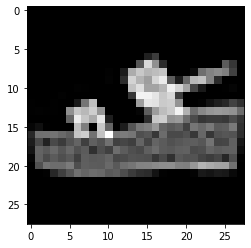

In [ ]:
plt.imshow(train_imgs_fash[12],  cmap=plt.get_cmap('gray'))

# **HOMEWORK 1**
Build a classifier for fashion MNIST.

**1. Use exactly the same architectures (both densely connected layers and from convolutional layers) as the above MNIST** e.g., replace the dataset. Save the Jupyter Notebook in its original format and output a PDF file after training, testing, and validation. Make sure to write down how do they perform (training accuracny, testing accuracy).  
**2. Improve the architecture**. Experiment with different numbers of layers, size of layers, number of filters, size of filters. You are required to make those adjustment to get the highest accuracy. Watch out for overfitting -- we want the highest testing accuracy!
Please provide a PDF file of the result, the best test accuracy and the architecture (different numbers of layers, size of layers, number of filters, size of filters)

# Visualizing Filter Response

We use gradient descent in input space to display the visual pattern each filter is maximally responsive to.  
To this end we take a VGG19 convnet pretrained on the ImageNet dataset.

[Very Deep Convolutional Networks for Large-Scale Image Recognition](https://arxiv.org/abs/1409.1556)
Karen Simonyan, Andrew Zisserman

[DL Architecture](https://neurohive.io/wp-content/uploads/2018/11/vgg16-neural-network.jpg)

In [40]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras import backend as K
import numpy as np

import matplotlib.pyplot as plt

#Load pretrained model
#we omit the densely connected layers of the network
model = VGG19(weights='imagenet', include_top=False)

80134624/80134624 [==============================] - 0s 0us/step


In [41]:
model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [42]:
#Specify filter you want to visualize and get its output
layer_name = 'block5_conv3'
filter_index = 3
layer_output = model.get_layer(layer_name).output

#Loss is the averaged activation of the chosen filter
loss = K.mean(layer_output[:, :, :, filter_index])

In [43]:
#Gradients of loss with respect to the input
#upgrading to 2.x: tf.gradients is no longer supported
#requiring tf.compat.v1.disable_eager_execution()
grads = K.gradients(loss, model.input)[0]

#A trick is to normalize the gradients by their L2 norm
#This ensures that the magnitude of the gradients is always in the same range
#and leads to a smooth descent process
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

In [44]:
#The tensors defined so far (loss, grads) were symbolic
#To obtain values we need to feed an input via K.function

iterate = K.function([model.input], [loss, grads])
loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))])

In [45]:
print(grads)
print(grads_value)

Tensor("truediv:0", shape=(None, None, None, 3), dtype=float32)
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]


In [46]:
#Implement the actual gradient descent
#Initial input is a grey image with some noise

input_img_data = np.random.random((1, 150, 150, 3)) * 20 + 128.
step = 1.
for i in range(40):
    loss_value, grads_value = iterate([input_img_data])
    input_img_data += grads_value * step

In [47]:
print(grads_value)

[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]


In [48]:
#Postprocess to turn into displayable image

def deprocess_image(x):
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    x += 0.5
    x = np.clip(x, 0, 1)

    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

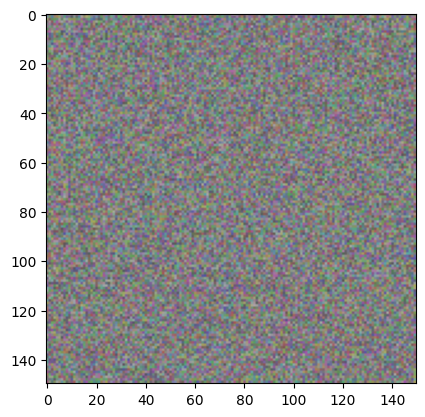

In [49]:
plt.imshow(deprocess_image(input_img_data[0]))